In [1]:
library("readxl")
library("dplyr")
library(ggplot2)
install.packages("corrplot")
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [2]:
real_estate <- read_excel("Real estate valuation data set.xlsx")
head(real_estate)

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [3]:
real_estate <- real_estate %>%
        rename(
            transaction_date = `X1 transaction date`,
            house_age = `X2 house age`,
            nearest_station = `X3 distance to the nearest MRT station`,
            num_convenience = `X4 number of convenience stores`,
            lat = `X5 latitude`,
            lon = `X6 longitude`,
            house_price = `Y house price of unit area`
        )
head(real_estate)

No,transaction_date,house_age,nearest_station,num_convenience,lat,lon,house_price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


#### Summary of key features:

In [4]:
summary(real_estate$house_age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   9.025  16.100  17.713  28.150  43.800 

The mean of house age is 17.713 years, with a minimum of 0 years and a maximum of 43.8 years.

In [5]:
summary(real_estate$nearest_station)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.38  289.32  492.23 1083.89 1454.28 6488.02 

The mean of distance to the nearest MRT station is 1083.89 meters, with a minimum of 23.38 meters and a maximum of 6488.02 meters.

In [6]:
summary(real_estate$num_convenience)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   4.094   6.000  10.000 

The mean of the number of convenience stores in the living circle on foot is roughly 4, with a minimum of 0 and a maximum of 10.

In [7]:
summary(real_estate$house_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.60   27.70   38.45   37.98   46.60  117.50 

The mean of house price is 37.98 (10000 New Taiwan Dollar/Ping), with a minimum of 7.6 (10000 New Taiwan Dollar/Ping) and a maximum of 117.5 (10000 New Taiwan Dollar/Ping).

#### Visualizations of the data:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


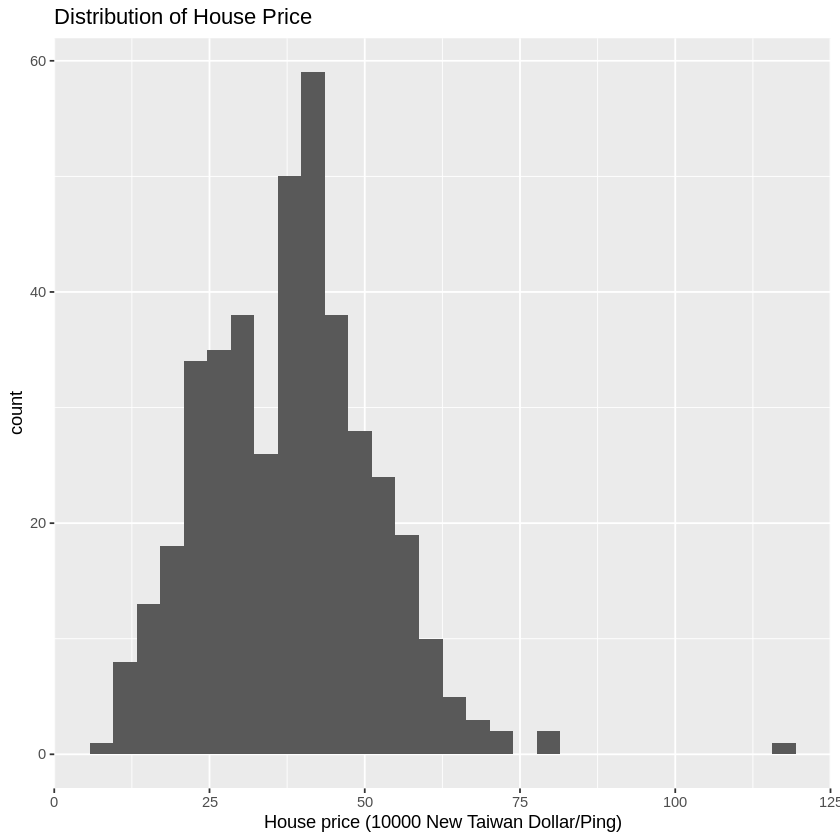

In [8]:
# Visualize the distribution of house price (response variable)
ggplot(real_estate, aes(x = house_price)) +
    geom_histogram() +
    xlab("House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("Distribution of House Price")

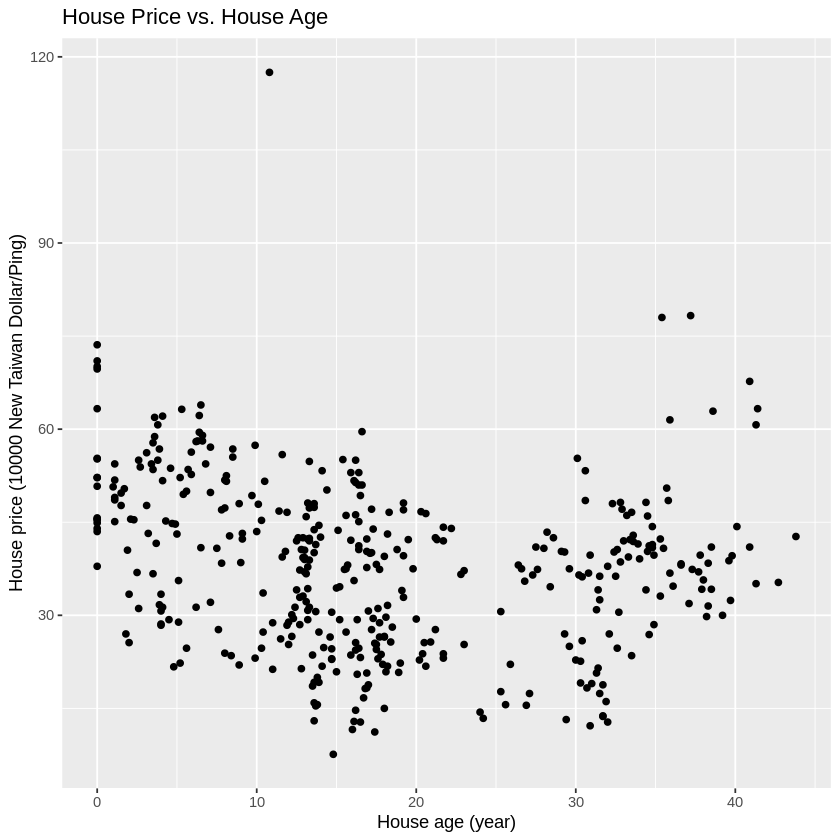

In [9]:
# Visualize the relationship between house age and house price
ggplot(real_estate, aes(x = house_age, y = house_price)) +
    geom_point() +
    labs(x = "House age (year)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. House Age")

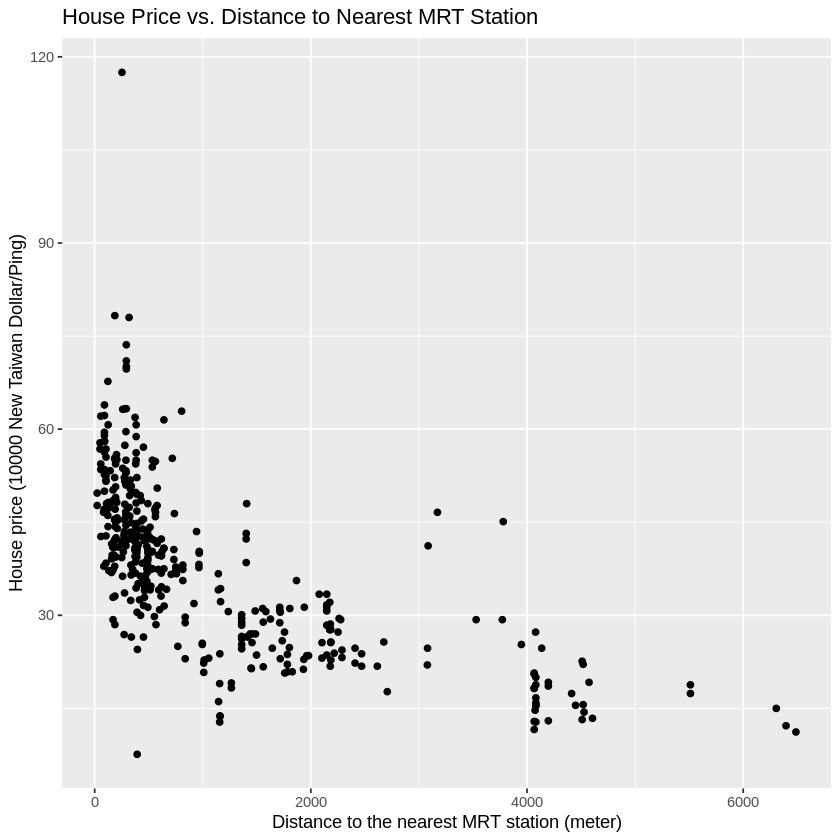

In [10]:
# Visualize the relationship between distance to nearest MRT station and house price
ggplot(real_estate, aes(x = nearest_station, y = house_price)) +
    geom_point() +
    labs(x = "Distance to the nearest MRT station (meter)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Distance to Nearest MRT Station")

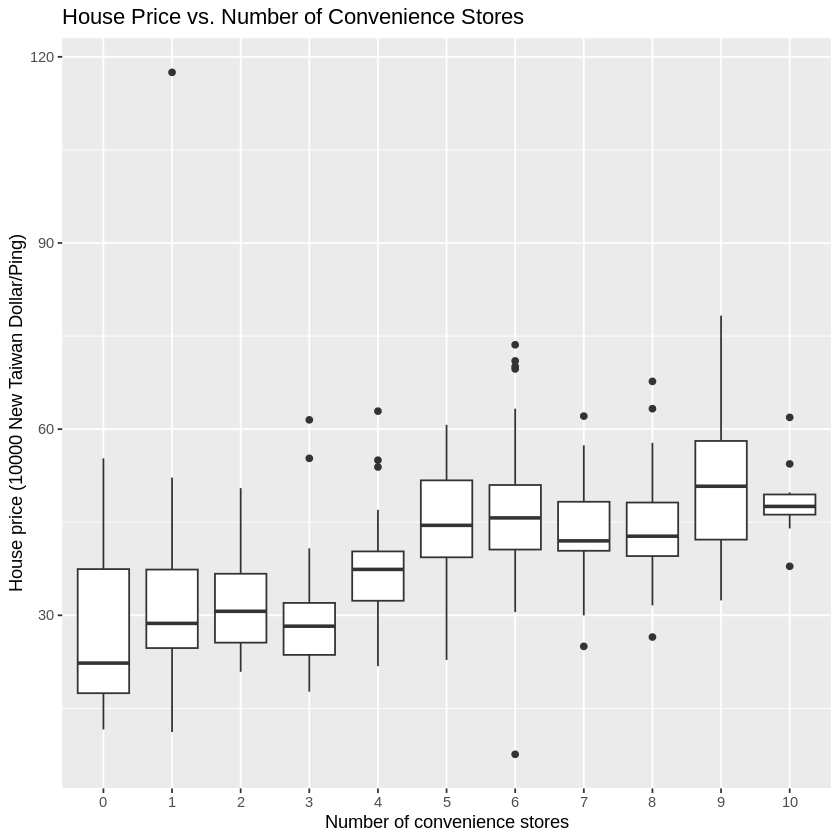

In [11]:
# Visualize the relationship between number of convenience stores and house price
ggplot(real_estate, aes(x = as.factor(num_convenience), y = house_price)) +
    geom_boxplot() +
    labs(x = "Number of convenience stores", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Number of Convenience Stores")

,house_age,nearest_station,num_convenience,house_price
house_age,1.00000000,0.02562205,0.04959251,-0.2105670
nearest_station,0.02562205,1.00000000,-0.60251914,-0.6736129
num_convenience,0.04959251,-0.60251914,1.00000000,0.5710049
house_price,-0.21056705,-0.67361286,0.57100491,1.0000000


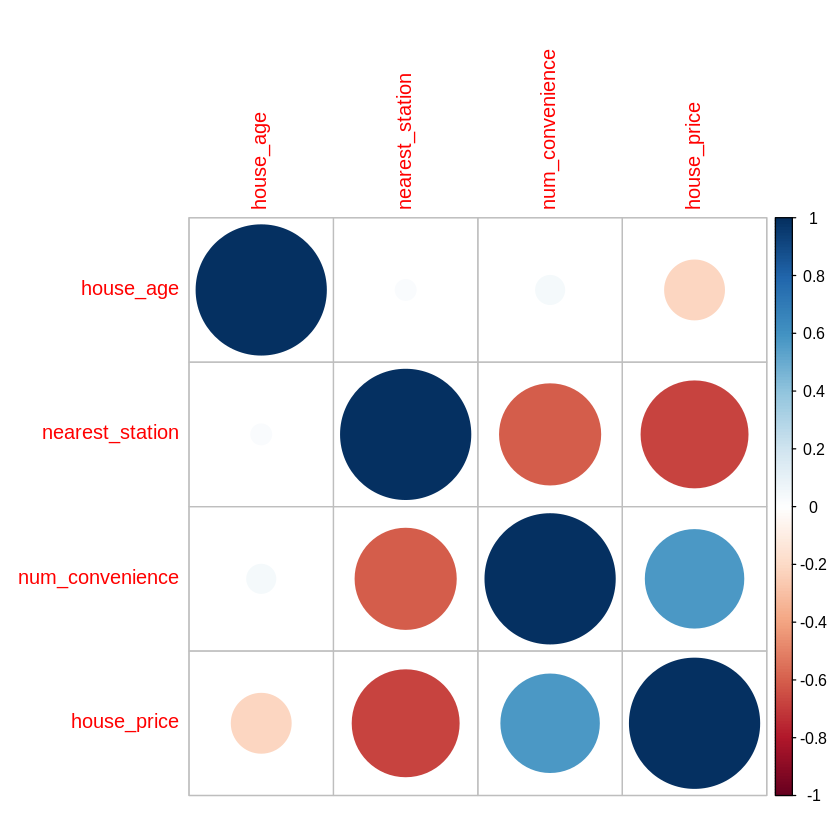

In [19]:
# Correlation matrix
cor_matrix <- cor(real_estate[, c("house_age", "nearest_station", "num_convenience", "house_price")])
cor_matrix
corrplot(cor_matrix)